In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from datetime import datetime
from datetime import timezone

from math import cos, radians
import matplotlib.patches as mpatches

# Data uploading

In [2]:
runway = "21"

YEARS = ["2019", "2020"]
MONTHS = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
WEEKS = [1,2,3,4,5]

runway_df = pd.DataFrame()

for year in YEARS:
        
    for month in MONTHS:
    
        for week in WEEKS:
        
            if week == 5 and month == '02' and not calendar.isleap(int(year)):
                    continue
                    
            filename = "../../Opensky/Data/ESGG/" + year + "/osn_ESGG_states_TMA_" + year + \
                       "_by_runways/osn_ESGG_states_TMA_" + year + "_" + month + "_week" + \
                       str(week) + "_by_runways/osn_arrival_ESGG_states_TMA_" + year + \
                       "_" + month + "_week" + str(week) + "_rwy" + runway + ".csv"
            week_df = pd.read_csv(filename, sep=' ', names = ['flightId', 'sequence', 'timestamp', \
                      'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
            
            runway_df = runway_df.append(week_df)

runway_df.set_index(['flightId', 'sequence'], inplace = True)

In [3]:
def plot_TMA():
    TMA_lon=[12.4975, 13.1639, 13.3244, 13.3244, 13.2769, 13.1992, 12.6958, 11.7661, 11.5828, 11.1406, 11.4503, 12.2956,
         11.9975, 12.4975];


    TMA_lat=[58.7661, 58.7328, 58.5169, 58.2953, 58.0969, 57.7672, 57.2275, 56.9856, 57.2136, 57.7514, 58.1278, 58.6456,
         58.4653, 58.7661];

    rwy03_lon=[12.26771, 12.29193];
    rwy03_lat=[57.64952, 57.67615 ];
    
    KELIN_lon =    12.0542
    KELIN_lat =    58.2436
    LOBBI_lon =    11.4981
    LOBBI_lat =    57.3181
    MAKUR_lon =    11.4069
    MAKUR_lat =    57.4297
    MOXAM_lon =    13.3139
    MOXAM_lat =    58.5314
    NEGIL_lon =    12.6253
    NEGIL_lat =    58.2513
    RISMA_lon =    11.9792
    RISMA_lat =    57.0419
    ARQUS_lon =    12.9286
    ARQUS_lat =    57.0958
    
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
    #print(central_latitude)
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy03_lon,rwy03_lat, color="red")
  
    plt.plot(KELIN_lon, KELIN_lat, 'ro')
    plt.plot(LOBBI_lon, LOBBI_lat, 'ro')
    plt.plot(MAKUR_lon, MAKUR_lat, 'ro')
    plt.plot(MOXAM_lon, MOXAM_lat, 'ro')
    plt.plot(NEGIL_lon, NEGIL_lat, 'ro')
    plt.plot(RISMA_lon, RISMA_lat, 'ro')
    plt.plot(ARQUS_lon, ARQUS_lat, 'ro')
    
    plt.text(KELIN_lon+0.01, KELIN_lat+0.01, "KELIN")
    plt.text(LOBBI_lon+0.01, LOBBI_lat+0.01, "LOBBI")
    plt.text(MAKUR_lon+0.01, MAKUR_lat+0.01, "MAKUR")
    plt.text(MOXAM_lon+0.01, MOXAM_lat+0.01, "MOXAM")
    plt.text(NEGIL_lon+0.01, NEGIL_lat+0.01, "NEGIL")
    plt.text(RISMA_lon+0.01, RISMA_lat+0.01, "RISMA")
    plt.text(ARQUS_lon+0.01, ARQUS_lat+0.01, "ARQUS")

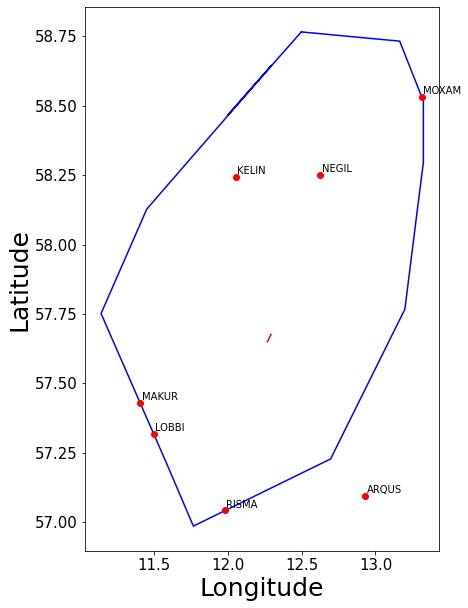

In [4]:
plot_TMA()

In [5]:
def get_color(cluster):
    if cluster == 1:
        return 'lime'
    if cluster == 2:
        return 'brown'
    if cluster == 3:
        return 'orange'
    if cluster == 4:
        return 'green'
    if cluster == 5:
        return 'cyan'
    if cluster == 6:
        return 'darkviolet'
    if cluster == 7:
        return 'magenta'
    if cluster == 8:
        return 'pink'
    if cluster == 9:
        return 'darkblue'
    if cluster == 10:
        return 'darkcyan'

In [6]:
def plot_legend(number_of_clusters):
    handles = []
    for i in range(0, number_of_clusters):
        cluster_color = get_color(i+1)
        color_patch = mpatches.Patch(color=cluster_color, label='cluster ' + str(i+1))
        handles += [color_patch]
    plt.legend(handles=handles, fontsize=10, loc="best")

In [7]:
def plot_horizontal_profile_clustering(df, number_of_clusters, clustering_df):
    linewidth = 1
    #fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    #mercator_aspect_ratio = 1/cos(radians(central_lat))

    # set the aspect ratio of the axes to that
    #ax.set_aspect(mercator_aspect_ratio)

    #plt.xlabel('Longitude', fontsize=25)
    #plt.ylabel('Latitude', fontsize=25)  
    
    #plt.tick_params(labelsize=15)
    
    plot_TMA()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flightId'):
        #print(flight_id)
        flight_states_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        
        #print(flight_states_df.tail())
        for seq, row in flight_states_df.groupby(level='sequence'):
        
            lon.append(row['lon'].item())
            lat.append(row['lat'].item())
        
        color = get_color(clustering_df.loc[flight_id]['cluster'])
        plt.plot(lon, lat, color=color, linewidth=linewidth)
        plt.plot(clustering_df.loc[flight_id]['center_lon'], clustering_df.loc[flight_id]['center_lat'], 'ko')
    plot_legend(number_of_clusters)

In [8]:
number_of_clusters = 7
filename = "../Data/Clustering/osn_arrival_ESGG_TMA_rwy" + runway + "_clusters_" + str(number_of_clusters) + ".csv"
clusters_df = pd.read_csv(filename, sep=' ')
clusters_df.set_index(['flightId'], inplace=True)

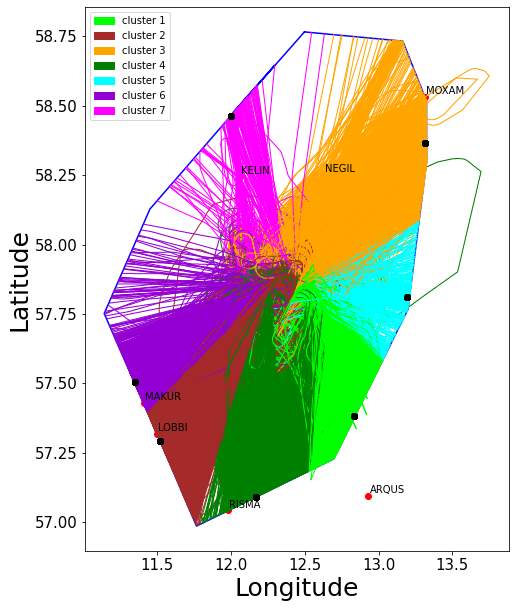

In [9]:
plot_horizontal_profile_clustering(runway_df, number_of_clusters, clusters_df)